**<font size=8> Final Project - Probability Course: Medical Insurance Cost**

This project focus on the analysis of treatment cost of policyholder with the emphasize in probability. The treatment cost depends can be affected by many variables, hence this project will focus on determining the significant variables which affect the cost by using various probabilty tools.

**Importing Necessary Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

**Importing and checking the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
insurance_data = pd.read_csv("gdrive/My Drive/Colab Notebooks/Tugas Pacmann/Intro to Prob/Project/insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance_data.info() #checking column data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.isnull().sum() #checking missing value in datasets

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**<font size=5>A. Descriptive Statistics Analysis**

**1. General Mean & Median**

In [7]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**2. Mean & Median Based on Smoker Status**

a. Mean & Median of **Smoker** Policyholder

In [8]:
insurance_data[insurance_data['smoker'] == 'yes'].describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


b. Mean & Median of **Nonsmoker** Policyholder

In [9]:
insurance_data[insurance_data['smoker'] == 'no'].describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


**3. Mean & Median Based on BMI**

BMI Category:
* BMI < 25 = healthy BMI
* BMI < 25 = unhealthy BMI (overweight)

a. Mean & Median of Policyholder with **BMI < 25**

In [10]:
insurance_data[insurance_data['bmi'] < 25].describe()

,age,bmi,children,charges
count,245.000000,245.000000,245.000000,245.000000
mean,36.375510,22.203898,1.122449,10282.224474
std,13.606811,2.103806,1.238598,7520.485850
min,18.000000,15.960000,0.000000,1121.873900
25%,24.000000,20.800000,0.000000,3861.209650
50%,35.000000,22.705000,1.000000,8582.302300
75%,47.000000,23.900000,2.000000,14571.890800
max,64.000000,24.985000,5.000000,35069.374520


b. Mean & Median of Policyholder with **BMI > 25**

In [11]:
insurance_data[insurance_data['bmi'] > 25].describe()

,age,bmi,children,charges
count,1091.000000,1091.000000,1091.000000,1091.000000
mean,39.817599,32.573483,1.089826,13946.476035
std,14.071792,4.982788,1.199081,12834.725537
min,18.000000,25.080000,0.000000,1131.506600
25%,27.000000,28.600000,0.000000,4889.518150
50%,40.000000,31.900000,1.000000,9563.029000
75%,52.000000,35.815000,2.000000,17654.442975
max,64.000000,53.130000,5.000000,63770.428010


**3. Mean & Median Based on Gender**

a. Mean & Median of **Male** Policyholder

In [12]:
insurance_data[insurance_data['sex'] == 'male'].describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


b. Mean & Median of **Female** Policyholder

In [13]:
insurance_data[insurance_data['sex'] == 'female'].describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


**4. Mean & Median of Smoker Based on BMI**

a. Mean & Median of **Smoker** Policyholder with **BMI < 25**

In [14]:
insurance_data[(insurance_data['smoker'] == 'yes') & 
               (insurance_data['bmi'] < 25)].describe()

,age,bmi,children,charges
count,55.000000,55.000000,55.000000,55.000000
mean,37.309091,22.277182,1.236364,19839.278309
std,12.480908,2.182447,1.261446,4583.245438
min,18.000000,17.195000,0.000000,12829.455100
25%,27.500000,20.710000,0.000000,16499.137025
50%,38.000000,22.895000,1.000000,19361.998800
75%,45.500000,24.130000,2.000000,22049.467450
max,64.000000,24.890000,5.000000,35069.374520


b. Mean & Median of **Smoker** Policyholder with **BMI > 25**

In [15]:
insurance_data[(insurance_data['smoker'] == 'yes') & 
               (insurance_data['bmi'] > 25)].describe()

,age,bmi,children,charges
count,219.000000,219.000000,219.000000,219.000000
mean,38.817352,32.825890,1.082192,35116.909657
std,14.273009,5.136105,1.130317,10702.561195
min,18.000000,25.100000,0.000000,15518.180250
25%,25.500000,28.345000,0.000000,24601.558775
50%,38.000000,32.015000,1.000000,37270.151200
75%,50.000000,36.080000,2.000000,42808.670100
max,64.000000,52.580000,4.000000,63770.428010


**5. Mean & Median of Smoker Based on Gender**

a. Mean & Median of **Smoker Male** Policyholder

In [16]:
insurance_data[(insurance_data['smoker'] == 'yes') & 
               (insurance_data['sex'] == 'male')].describe()

,age,bmi,children,charges
count,159.000000,159.000000,159.000000,159.000000
mean,38.446541,31.504182,1.188679,33042.005975
std,13.751247,5.952028,1.170144,11202.670862
min,18.000000,17.290000,0.000000,12829.455100
25%,27.000000,27.360000,0.000000,21241.526875
50%,38.000000,31.130000,1.000000,36085.219000
75%,49.500000,35.565000,2.000000,41797.589050
max,64.000000,52.580000,4.000000,62592.873090


b. Mean & Median of **Smoker Female** Policyholder

In [17]:
insurance_data[(insurance_data['smoker'] == 'yes') & 
               (insurance_data['sex'] == 'female')].describe()

,age,bmi,children,charges
count,115.000000,115.000000,115.000000,115.000000
mean,38.608696,29.608261,1.008696,30678.996276
std,14.217419,6.663802,1.135516,11907.536381
min,18.000000,17.195000,0.000000,13844.506000
25%,26.500000,24.650000,0.000000,19696.432100
50%,39.000000,28.380000,1.000000,28950.469200
75%,48.500000,34.352500,2.000000,40918.314500
max,64.000000,47.600000,5.000000,63770.428010


**<font size=4>Analysis**

* The charges column have outlier
* Smoker status have influence on the medical charges amount
* BMI have influence on the medical charges amount (lesser influence compared to smoker status)
* There is no significant difference in charges between male and female, 
* However, when comparing male and female smoker, the charges mean and median of male smoker is higher than female smoker. This might caused by difference in variance

**<font size=5>B. Categorical Variables Analysis**


**1. Proportion Analysis**


a. Region Proportion

In [18]:
sw_ph = len(insurance_data[insurance_data["region"]=="southwest"])
se_ph = len(insurance_data[insurance_data["region"]=="southeast"])
nw_ph = len(insurance_data[insurance_data["region"]=="northwest"])
ne_ph = len(insurance_data[insurance_data["region"]=="northeast"])

print(f"SW policyholder amount: {sw_ph}")
print(f"SE policyholder amount: {se_ph}")
print(f"NW policyholder amount: {nw_ph}")
print(f"NE policyholder amount: {ne_ph}")

SW policyholder amount: 325
SE policyholder amount: 364
NW policyholder amount: 325
NE policyholder amount: 324


([<matplotlib.patches.Wedge at 0x7fc2553aadd0>,
 [Text(0.7949723523462666, 0.7602755809606433, 'Southwest policyholder'),
  Text(-0.7967552295083369, 0.7584069516104911, 'Southeast policyholder'),
  Text(-0.7201694244483217, -0.8314782018127556, 'Northwest policyholder'),
  Text(0.7967551940047443, -0.7584069889092945, 'Northeast policyholder')],
 [Text(0.43362128309796355, 0.4146957714330781, '24%'),
  Text(-0.4345937615500019, 0.4136765190602678, '27%'),
  Text(-0.39281968606272083, -0.45353356462513933, '24%'),
  Text(0.4345937421844059, -0.41367653940506965, '24%')])

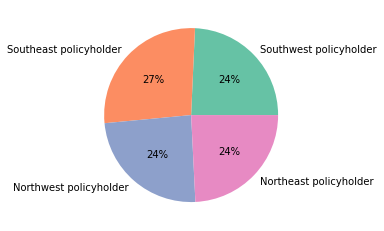

In [19]:
region_pie_label = ["Southwest policyholder","Southeast policyholder", "Northwest policyholder", "Northeast policyholder"]
region_pie_data = [sw_ph, se_ph, nw_ph, ne_ph]

plt.pie(region_pie_data, labels=region_pie_label, colors=sns.color_palette('Set2'), autopct='%.0f%%')

b. Smoker Status Proportion

In [20]:
n_smoker = len(insurance_data[insurance_data["smoker"]=="yes"])
n_non_smoker = len(insurance_data[insurance_data["smoker"]=="no"])

print(f"smoker policyholder amount: {n_smoker}")
print(f"nonsmoker policyholder amount: {n_non_smoker}")

smoker policyholder amount: 274
nonsmoker policyholder amount: 1064


([<matplotlib.patches.Wedge at 0x7fc254ef3f50>,
 [Text(0.8801026332278259, 0.6598631335250115, 'Smoker'),
  Text(-0.880102633227826, -0.6598631335250114, 'Nonsmoker')],
 [Text(0.48005598176063224, 0.35992534555909717, '20%'),
  Text(-0.4800559817606323, -0.3599253455590971, '80%')])

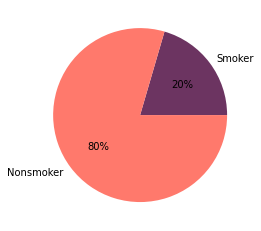

In [21]:
smoker_color = ['#6c3461', # Smoker
                '#ff796c', # Non-smoker
               ]
smoker_pie_label = ["Smoker", "Nonsmoker"]
smoker_pie_data = [n_smoker, n_non_smoker]

plt.pie(smoker_pie_data, labels=smoker_pie_label, colors=sns.color_palette(smoker_color), autopct='%.0f%%')

c. Gender Proportion

In [22]:
n_male = len(insurance_data[insurance_data["sex"]=="male"])
n_female = len(insurance_data[insurance_data["sex"]=="female"])

print(f"male policyholder amount: {n_male}")
print(f"female policyholder amount: {n_female}")

male policyholder amount: 676
female policyholder amount: 662


([<matplotlib.patches.Wedge at 0x7fc254e50390>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'Male'),
  Text(0.018078568997005343, -1.0998514287589123, 'Female')],
 [Text(-0.009861037634729992, 0.5999189611412249, '51%'),
  Text(0.009861037634730185, -0.5999189611412248, '49%')])

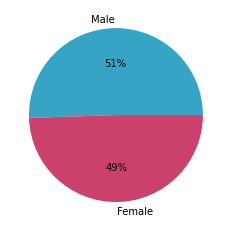

In [23]:
gender_color = ['#36a4c4', #Male
                '#cb416b', #Female
               ]
gender_pie_label = ["Male", "Female"]
gender_pie_data = [n_male, n_female]

plt.pie(gender_pie_data, labels=gender_pie_label, colors=sns.color_palette(gender_color), autopct='%.0f%%')

**2. Probability Question**

Probability of male and female policyholder if he/she known to be a smoker

In [24]:
n_smoker = len(insurance_data[insurance_data["smoker"]=="yes"])
n_smoker_female = len(insurance_data[(insurance_data["smoker"]=="yes") & (insurance_data["sex"]=="female")])
n_smoker_male = len(insurance_data[(insurance_data["smoker"]=="yes") & (insurance_data["sex"]=="male")])

print(f"n(smoker)= {n_smoker}")
print(f"n(smoker n male)= {n_smoker_male}")
print(f"n(smoker n female)= {n_smoker_female} \n")

p_smoker_male = n_smoker_male / n_smoker
p_smoker_female = n_smoker_female / n_smoker

print(f"P(male|smoker)= {round(p_smoker_male,2)}")
print(f"P(female|smoker)= {round(p_smoker_female,2)}")

n(smoker)= 274
n(smoker n male)= 159
n(smoker n female)= 115 

P(male|smoker)= 0.58
P(female|smoker)= 0.42


**<font size=5>C. Continuous Variables Analysis**

**1. Which one is more likely to happen between the two condition below:**
* Policyholders who is a **smoker** to have medical charges above 16.7k or,
* Policyholders who is a **nonsmoker** to have medical charges above 16.7k

In [25]:
n_smoker = len(insurance_data[(insurance_data["smoker"]=="yes")])
n_smoker_ch167 = len(insurance_data[(insurance_data["smoker"]=="yes") & 
                                    (insurance_data["charges"]>16700)])
p_smoker_ch167 = n_smoker_ch167 / n_smoker

print("n(smoker)=",n_smoker)
print("n(smoker n charges>16.7k)=",n_smoker_ch167)
print("P(smoker n charges>16.7k)=",p_smoker_ch167)

n(smoker)= 274
n(smoker n charges>16.7k)= 254
P(smoker n charges>16.7k)= 0.927007299270073


In [26]:
n_nonsmoker = len(insurance_data[(insurance_data["smoker"]=="no")])
n_nonsmoker_ch167 = len(insurance_data[(insurance_data["smoker"]=="no") & 
                                       (insurance_data["charges"]>16700)])
p_nonsmoker_ch167 = n_nonsmoker_ch167 / n_nonsmoker

print("n(nonsmoker)=",n_nonsmoker)
print("n(nonsmoker n charges>16.7k)=",n_nonsmoker_ch167)
print("P(nonsmoker n charges>16.7k)=",p_nonsmoker_ch167)

n(nonsmoker)= 1064
n(nonsmoker n charges>16.7k)= 80
P(nonsmoker n charges>16.7k)= 0.07518796992481203


> **Policyholder who is a smoker is more likely to have medical charges above 16.7k compared to nonsmoker**

**2. Which one is more likely to happen between the two condition below:**
* Policyholders with BMI above 25 to have medical charges above 16.7k or,
* Policyholders with BMI below 25 to have medical charges above 16.7k

In [27]:
n_bmia25 = len(insurance_data[(insurance_data["bmi"]>25)])
n_bmia25_ch167 = len(insurance_data[(insurance_data["bmi"]>25) & 
                                    (insurance_data["charges"]>16700)])
p_bmia25_ch167 = n_bmia25_ch167 / n_bmia25
print("n(bmi>25)=",n_bmia25)
print("n(bmi>25 n charges>16.7k)=",n_bmia25_ch167)
print("P(bmi>25 n charges>16.7k)=",p_bmia25_ch167)

n(bmi>25)= 1091
n(bmi>25 n charges>16.7k)= 283
P(bmi>25 n charges>16.7k)= 0.25939505041246563


In [28]:
n_bmiu25 = len(insurance_data[(insurance_data["bmi"]<25)])
n_bmiu25_ch167 = len(insurance_data[(insurance_data["bmi"]<25) & 
                                    (insurance_data["charges"]>16700)])
p_bmiu25_ch167 = n_bmiu25_ch167 / n_bmiu25
print("n(bmi<25)=", n_bmiu25)
print("n(bmi<25 n charges>16.7k)=", n_bmiu25_ch167)
print("P(bmi<25 n charges>16.7k)=", p_bmiu25_ch167)

n(bmi<25)= 245
n(bmi<25 n charges>16.7k)= 51
P(bmi<25 n charges>16.7k)= 0.20816326530612245


> **Policyholders who have BMI >25 is more likely to have medical charges above 16.7k compared to those with BMI <25**

**3. Which one is more likely to happen between the two condition below:**
* Policyholders who is **a smoker and BMI above 25** to have **medical charges above 16.7k** or,
* Policyholders who is **a nonsmoker and BMI above 25** to have **medical charges above 16.7k**

In [29]:
n_smoker_bmia25 = len(insurance_data[(insurance_data["smoker"]=="yes") & 
                                     (insurance_data["bmi"]>25)])
n_smoker_bmia25_ch167 = len(insurance_data[(insurance_data["smoker"]=="yes") & 
                                           (insurance_data["bmi"]>25) & 
                                           (insurance_data["charges"]>16700)])
p_smoker_bmia25_ch167 = n_smoker_bmia25_ch167 / n_smoker_bmia25

print("n(smoker n BMI>25)=",n_smoker_bmia25)
print("n(smoker n BMI>25 n charges>16.7k)=",n_smoker_bmia25_ch167)
print("P(charges>16.7k | smoker n BMI>25)=",p_smoker_bmia25_ch167)

n(smoker n BMI>25)= 219
n(smoker n BMI>25 n charges>16.7k)= 215
P(charges>16.7k | smoker n BMI>25)= 0.9817351598173516


In [30]:
n_nonsmoker_bmia25 = len(insurance_data[(insurance_data["smoker"]=="no") & 
                                        (insurance_data["bmi"]>25)])
n_nonsmoker_bmia25_ch167 = len(insurance_data[(insurance_data["smoker"]=="no") & 
                                              (insurance_data["bmi"]>25) & 
                                              (insurance_data["charges"]>16700)])
p_nonsmoker_bmia25_ch167 = n_nonsmoker_bmia25_ch167 / n_nonsmoker_bmia25

print("n(nonsmoker n BMI>25)=",n_nonsmoker_bmia25)
print("n(nonsmoker n BMI>25 n charges>16.7k)=",n_nonsmoker_bmia25_ch167)
print("P(charges>16.7k | nonsmoker n BMI>25)=",p_nonsmoker_bmia25_ch167)

n(nonsmoker n BMI>25)= 872
n(nonsmoker n BMI>25 n charges>16.7k)= 68
P(charges>16.7k | nonsmoker n BMI>25)= 0.0779816513761468


> **Policyholders who is a smoker and have BMI >25 is more likely to have medical charges above 16.7k compared to policyholders who is a non-smoker and have BMI >25**

**4. Which one is more likely to happen between the two condition below:**
* Policyholders who is **a smoker and BMI below 25** to have **medical charges above 16.7k** or,
* Policyholders who is **a non-smoker and BMI below 25** to have **medical charges above 16.7k**

In [31]:
n_smoker_bmiu25 = len(insurance_data[(insurance_data["smoker"]=="yes") & 
                                     (insurance_data["bmi"]<25)])
n_smoker_bmiu25_ch167 = len(insurance_data[(insurance_data["smoker"]=="yes") & 
                                           (insurance_data["bmi"]<25) & 
                                           (insurance_data["charges"]>16700)])
p_smoker_bmiu25_ch167 = n_smoker_bmiu25_ch167 / n_smoker_bmiu25

print("n(smoker n BMI<25)=",n_smoker_bmiu25)
print("n(smoker n BMI<25 n charges>16.7k)=",n_smoker_bmiu25_ch167)
print("P(charges>16.7k | smoker n BMI<25)=",p_smoker_bmiu25_ch167)

n(smoker n BMI<25)= 55
n(smoker n BMI<25 n charges>16.7k)= 39
P(charges>16.7k | smoker n BMI<25)= 0.7090909090909091


In [32]:
n_nonsmoker_bmiu25 = len(insurance_data[(insurance_data["smoker"]=="no") & 
                                        (insurance_data["bmi"]<25)])
n_nonsmoker_bmiu25_ch167 = len(insurance_data[(insurance_data["smoker"]=="no") & 
                                              (insurance_data["bmi"]<25) & 
                                              (insurance_data["charges"]>16700)])
p_nonsmoker_bmiu25_ch167 = n_nonsmoker_bmiu25_ch167 / n_nonsmoker_bmiu25

print("n(nonsmoker n BMI<25)=",n_nonsmoker_bmiu25)
print("n(nonsmoker n BMI<25 n charges>16.7k)=",n_nonsmoker_bmiu25_ch167)
print("P(charges>16.7k | nonsmoker n BMI<25)=",p_nonsmoker_bmiu25_ch167)

n(nonsmoker n BMI<25)= 190
n(nonsmoker n BMI<25 n charges>16.7k)= 12
P(charges>16.7k | nonsmoker n BMI<25)= 0.06315789473684211


> **Policyholders who is a smoker with BMI <25 is more likely to have medical charges above 16.7k compared to policyholders who is a nonsmoker with BMI <25**

**<font size=5>D. Variables Correlation**

**1. Correlation between numerical variables**

covariance between quantitative variables
                   age           bmi    children       charges
age         197.401387      9.362337    0.719303  5.087480e+04
bmi           9.362337     37.187884    0.093795  1.464730e+04
children      0.719303      0.093795    1.453213  9.926742e+02
charges   50874.802298  14647.304426  992.674197  1.466524e+08 

correlation coefficient between quantitative variables
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


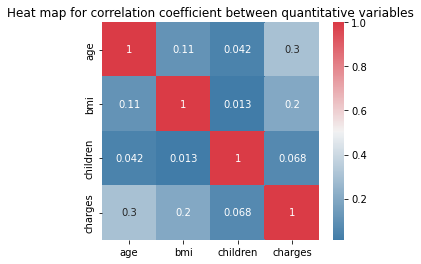

In [33]:
cov_insurance_data = insurance_data.cov()
corr_insurance_data = insurance_data.corr()

print('covariance between quantitative variables')
print(cov_insurance_data,'\n')
print('correlation coefficient between quantitative variables')
print(corr_insurance_data)

f, ax = plt.subplots(figsize=(5, 4))
plt.title("Heat map for correlation coefficient between quantitative variables")
sns.heatmap(corr_insurance_data, mask=np.zeros_like(corr_insurance_data, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, annot = True, ax=ax)

Based on the correlation coefficient value between age and charges have the highest correlation which is 0.3 (positive) and followed by BMI and charges with correlation coefficient value of 0.2 (positive).

**2. Correlation between numerical and categorical variables**

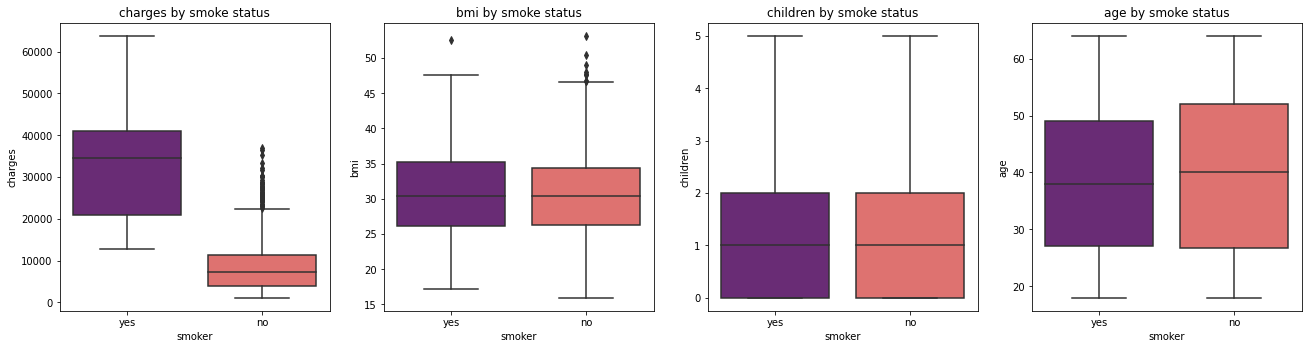

In [34]:
plt.subplots_adjust(bottom=1, right=3, top=2)

plt.subplot(141)
plt.title("charges by smoke status")
sns.boxplot(y="charges", x="smoker", data =  insurance_data, palette = 'magma')

plt.subplot(142)
plt.title("bmi by smoke status")
sns.boxplot(y="bmi", x="smoker", data =  insurance_data, palette = 'magma')

plt.subplot(143)
plt.title("children by smoke status")
sns.boxplot(y="children", x="smoker", data =  insurance_data, palette = 'magma')

plt.subplot(144)
plt.title("age by smoke status")
sns.boxplot(y="age", x="smoker", data =  insurance_data, palette = 'magma')

* Smoker have incured more cost to insurance than nonsmoker. There are outliers in nonsmoker
* Despite similar mean, BMI of smoker have higher upper quartile and lower lower qurtile compared to non smoker.
* BMI of non smoker has lot of outliers
* Number of children of smoker and nonsmoker is almost similar

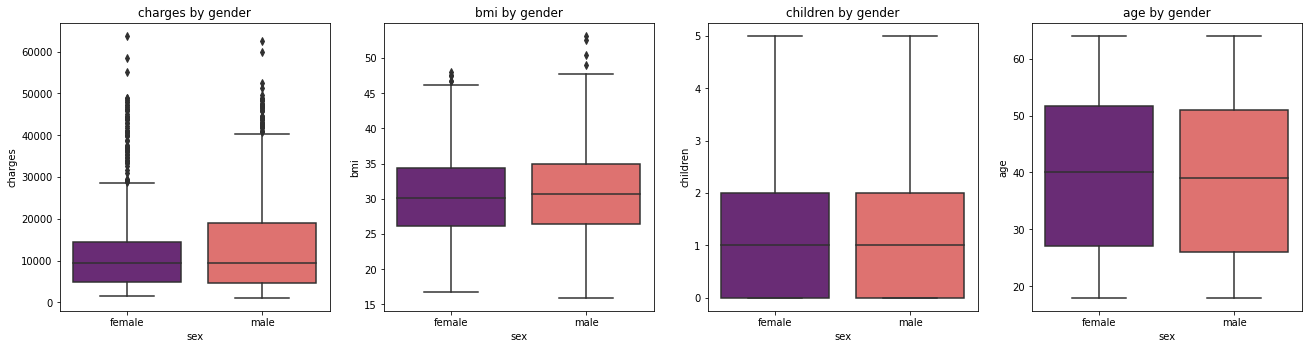

In [35]:
plt.subplots_adjust(bottom=1, right=3, top=2)

plt.subplot(141)
plt.title("charges by gender")
sns.boxplot(y="charges", x="sex", data =  insurance_data, palette = 'magma')

plt.subplot(142)
plt.title("bmi by gender")
sns.boxplot(y="bmi", x="sex", data =  insurance_data, palette = 'magma')

plt.subplot(143)
plt.title("children by gender")
sns.boxplot(y="children", x="sex", data =  insurance_data, palette = 'magma')

plt.subplot(144)
plt.title("age by gender")
sns.boxplot(y="age", x="sex", data =  insurance_data, palette = 'magma')

* Average Age of female policyholders is slightly higher than male policyholders
* No of children both male and female customer have is same
* BMI of Male policyholders has many outliers and Average BMI of male is slightly higher than female
* Male policyholders has incure more charges to insurance compared to female policyholders. There are lot of outliers in female policyholders

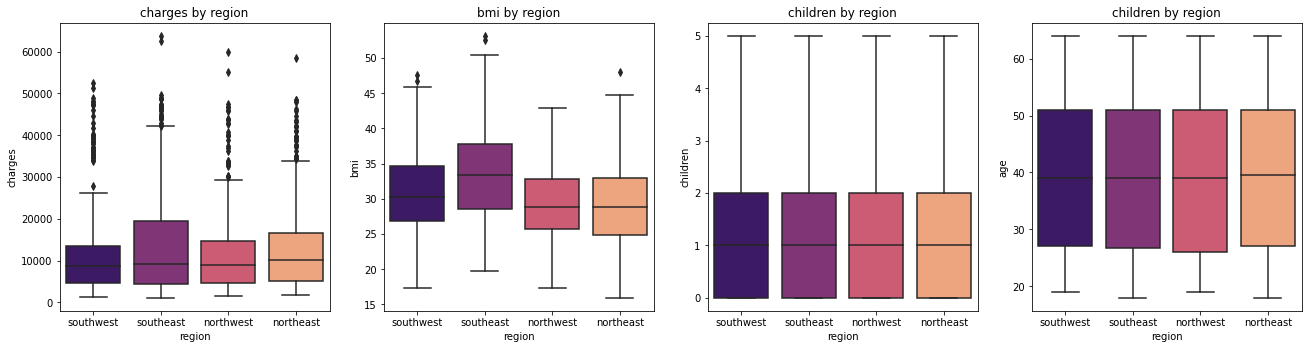

In [36]:
plt.subplots_adjust(bottom=1, right=3, top=2)

plt.subplot(141)
plt.title("charges by region")
sns.boxplot(y="charges", x="region", data =  insurance_data, palette = 'magma')

plt.subplot(142)
plt.title("bmi by region")
sns.boxplot(y="bmi", x="region", data =  insurance_data, palette = 'magma')

plt.subplot(143)
plt.title("children by region")
sns.boxplot(y="children", x="region", data =  insurance_data, palette = 'magma')

plt.subplot(144)
plt.title("children by region")
sns.boxplot(y="age", x="region", data =  insurance_data, palette = 'magma')

* Age and number of children across regions is almost same.
* Average BMI from southeast higher compared to other regions
* Charges incured from southeast is higher compared to other regions
* There are lot of outliers on upper end in charges

To avoid confounding bias, multivariate analysis need to performed

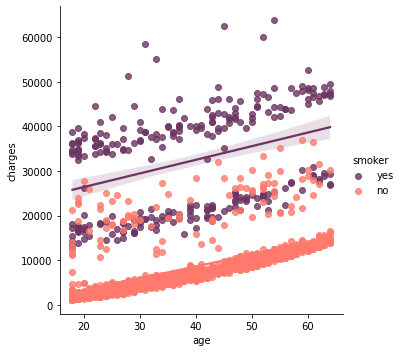

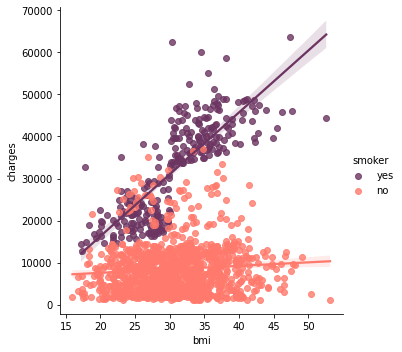

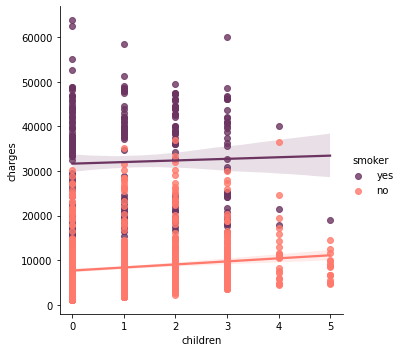

In [37]:
smoker_color = ['#6c3461', # Smoker
                '#ff796c', # Non-smoker
               ]

ax = sns.lmplot(x = 'age', y = 'charges', data=insurance_data, hue='smoker', palette=smoker_color)
ax = sns.lmplot(x = 'bmi', y = 'charges', data=insurance_data, hue='smoker', palette=smoker_color)
ax = sns.lmplot(x = 'children', y = 'charges', data=insurance_data, hue='smoker', palette=smoker_color)

* Both in smoker and non smoker group, age have positive correlation with charges (no bias)
* Smoker status affect the correlation between bmi and charges, in which the correlation increase significantly with smoker status
* Smoker have less children comparen to nonsmoker
* The smoker status have no significant influence on the correlation between charges and children

**chi square independency test**

In [38]:
cont_sex_smoker = pd.crosstab(insurance_data['sex'],
                              insurance_data['smoker'])
cont_region_smoker = pd.crosstab(insurance_data['region'],
                              insurance_data['smoker'])
cont_region_sex = pd.crosstab(insurance_data['region'],
                              insurance_data['sex'])

In [39]:
#independency test sex-smoker
c, p, dof, expected = chi2_contingency(cont_sex_smoker)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.006548143503580696
Dependent (reject H0)


In [40]:
#independency test region-smoker
c, p, dof, expected = chi2_contingency(cont_region_smoker)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.06171954839170541
Independent (H0 holds true)


In [41]:
#independency test region-sex
c, p, dof, expected = chi2_contingency(cont_region_sex)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9328921288772233
Independent (H0 holds true)


**<font size=5>E. Hypotesis Testing**

**1. Hypothesis testing: The medical charges of people who smoke is greater than those who don't**

1. Define null and alt hypothesis:

* H0:μ1 <= μ2 The average charges of smokers is less than or equal to nonsmokers
* H1:μ1 > μ2 The average charges of smokers is greater than nonsmokers

2. Decide the significance level. If P values is less than alpha reject the null hypothesis.
* α = 0.05

3. Identify the test:
* As standard deviation of the population is not known, T stat test would be appropriate. 
* The > sign in alternate hypothesis indicate test is right tailed

4. check samples amount

In [42]:
n_smoker = len(insurance_data[insurance_data['smoker']=='yes'])
n_nonsmoker = len(insurance_data[insurance_data['smoker']=='no'])
print('no. of smoker sample:', n_smoker)
print('no. of nonsmoker sample:', n_nonsmoker)

no. of smoker sample: 274
no. of nonsmoker sample: 1064


5. As the sample size of smoker is unequal with nonsmoker, bartlett test are performed to ensure the variances are equal for all samples:
* H0: The variances are equal for all samples
* H1: The variances are not equal for one pair or more

In [43]:
smoker_charges = insurance_data.loc[insurance_data['smoker']=='yes','charges']
nonsmoker_charges = insurance_data.loc[insurance_data['smoker']=='no','charges']

stat_bart, p_bart = stats.bartlett(smoker_charges, nonsmoker_charges)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_bart))
if p_bart <= alpha:
    print('The variances are not equal (reject H0)')
else:
    print('The variances are equal (H0 holds true)')

p value is 5.06089742139399e-52
The variances are not equal (reject H0)


6. As the test shows that the variances are not equal, There are two available methods, which are:

* Use Welch’s t-Test.
* Or use independent t-test with adjusted sample amount of nonsmoker

In this project Welch's t-test will be used. Welch's t-test can be performed by adding "equal_var=False"

In [44]:
alpha = 0.05
t_stat_1, p_val_t1 = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var = False)
p_value_onetail_1 = p_val_t1/2

print("test statistic = {} , p-value ={} , one-tail p-value = {}".format(t_stat_1,p_val_t1, p_value_onetail_1 ))

if p_value_onetail_1 < alpha :
    print("The average charges of smokers is greater than nonsmokers (reject H0)")
    
else:
    print("The average charges of smokers is less than or equal to nonsmokers (H0 holds true)")

test statistic = 32.751887766341824 , p-value =5.88946444671698e-103 , one-tail p-value = 2.94473222335849e-103
The average charges of smokers is greater than nonsmokers (reject H0)


**2. Hypothesis testing: The medical charges of people with BMI value above 25 is higher than those those with BMI value under 25**

1. Define null and alt hypothesis:
* H0:μ1 <= μ2  The average charges of insurance customer with BMI above 25 is less than or equal to those with BMI value under 25
* H1:μ1 > μ2   The average charges of insurance customer with BMI above 25 is greater than those with BMI value under 25

2. Decide the significance level. If P values is less than alpha reject the null hypothesis.
* α = 0.05

3. Identify the test:
* As standard deviation of the population is not known, T stat test would be appropriate. 
* The > sign in alternate hypothesis indicate test is right tailed

4. check samples amount

In [45]:
n_bmi_a_25 = len(insurance_data[insurance_data['bmi']>25])
n_bmi_u_25 = len(insurance_data[insurance_data['bmi']<25])
print('no. of bmi above 25:', n_bmi_a_25)
print('no. of bmi under 25:', n_bmi_u_25)

no. of bmi above 25: 1091
no. of bmi under 25: 245


5. As the sample size is unequal, **bartlett test** are performed to ensure the variances are equal for all samples:
* H0: The variances are equal for all samples
* H1: The variances are not equal for one pair or more

In [46]:
bmi_a_25_charges = insurance_data.loc[insurance_data['bmi']>25,'charges']
bmi_u_25_charges = insurance_data.loc[insurance_data['bmi']<25,'charges']

stat_bart, p_bart = stats.bartlett(bmi_a_25_charges, bmi_u_25_charges)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_bart))
if p_bart <= alpha:
    print('The variances are not equal (reject H0)')
else:
    print('The variances are equal (H0 holds true)')

p value is 2.3532085528057478e-21
The variances are not equal (reject H0)


6. As the test shows that the variances are not equal, There are two available methods, which are:
* Use Welch’s t-Test.
* Or use independent t-test with adjusted sample amount of nonsmoker 

In this project Welch's t-test will be used. Welch's t-test can be performed by adding **"equal_var=False"**

In [47]:
alpha = 0.05
t_stat_2, p_val_t2 = stats.ttest_ind(bmi_a_25_charges, bmi_u_25_charges, equal_var = False)
p_value_onetail_2 = p_val_t2/2

print("test statistic = {} , p-value ={} , one-tail p-value = {}".format(t_stat_2,p_val_t2, p_value_onetail_2 ))

if p_value_onetail_2 < alpha :
    print("The average charges of insurance customer with BMI above 25 is greater than those with BMI value under 25 (reject H0)")
    
else:
    print("The average charges of insurance customer with BMI above 25 is less than or equal to those with BMI value under 25 (H0 holds true)")

test statistic = 5.929878344096734 , p-value =5.080897303161378e-09 , one-tail p-value = 2.540448651580689e-09
The average charges of insurance customer with BMI above 25 is greater than those with BMI value under 25 (reject H0)


**3. Hypothesis testing: The medical charges of male is higher than female**

1. Define null and alt hypothesis:
* H0:μ1 <= μ2  The average charges of male is less than or equal to female
* H1:μ1 > μ2   The average charges of male is greater than female

2. Decide the significance level. If P values is less than alpha reject the null hypothesis.
* α = 0.05

3. Identify the test:
* As standard deviation of the population is not known, T stat test would be appropriate. 
* The > sign in alternate hypothesis indicate test is right tailed

4. Check samples amount

In [48]:
n_male = len(insurance_data[insurance_data['sex']=='male'])
n_female = len(insurance_data[insurance_data['sex']=='female'])
print('no. of male:', n_male)
print('no. of female', n_female)

no. of male: 676
no. of female 662


5. The sample size is almost equal, however we will still do **bartlett test** to ensure the variances are equal for all samples:
* H0: The variances are equal for all samples
* H1: The variances are not equal for one pair or more

In [49]:
male_charges = insurance_data.loc[insurance_data['sex']=='male','charges']
female_charges = insurance_data.loc[insurance_data['sex']=='female','charges']

stat_bart, p_bart = stats.bartlett(male_charges, female_charges)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_bart))
if p_bart <= alpha:
    print('The variances are not equal (reject H0)')
else:
    print('The variances are equal (H0 holds true)')

p value is 7.886776680290195e-05
The variances are not equal (reject H0)


6. As the test shows that the variances are not equal, There are two available methods, which are:
* Use Welch’s t-Test.
* Or use independent t-test with adjusted sample amount of nonsmoker 

In this project Welch's t-test will be used. Welch's t-test can be performed by adding **"equal_var=False"**

In [50]:
alpha = 0.05
t_stat_3, p_val_t3 = stats.ttest_ind(male_charges, female_charges, equal_var = False)
p_value_onetail_3 = p_val_t3/2

print("test statistic = {} , p-value ={} , one-tail p-value = {}".format(t_stat_3,p_val_t3, p_value_onetail_3 ))

if p_value_onetail_3 < alpha :
    print("The average charges of male is greater than female (reject H0)")
    
else:
    print("The average charges of male is less than or equal to female (H0 holds true)")

test statistic = 2.1008878232359565 , p-value =0.035841014956016645 , one-tail p-value = 0.017920507478008323
The average charges of male is greater than female (reject H0)


**<font size=5>Conclusion**

* Based on the analysis performed, several variables have significant effect on the value of medical charges of an insurance customer. These variables include:
    1.  BMI
    1.  Age
    1.  Smoker Status
    1.  Gender
* A person with high BMI value are more prone to diseases, which might cause higher medical charges
* Gender have effect on the value of charges, in which males have higher charges compared to female. However, the difference between both gender is small
* Age have effect on the value of charges, as older customer are more prone to diseases.
* Smoker status have big impact on the value of charges
* In addition smoker status can increase the effect of BMI and age to the value of charges


**Several variables have influence on the medical charges amount. However, the only controllable variables are BMI and smoker status. Thus, the insurance provider should focus on these two variables in order to push down the aggregate medical charges.**